In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from keras.layers import *
from keras.utils import np_utils
from keras.models import Sequential
from keras.models import *
import shutil

## CNN Model

In [3]:
def create_model():
    model = Sequential()
    
    model.add(Conv2D(32,(3,3),activation = "relu" , input_shape = (178,218,3))) # ORIGINAL WAS 150, 150
    model.add(Conv2D(56,(3,3), activation = "relu" ))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(72,(3,3),activation = "relu"))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(128,(3,3),activation = "relu"))
    model.add(MaxPool2D(2,2))
    model.add(Flatten())
    model.add(Dense(64,activation = "relu"))
    model.add(Dense(4,activation = "softmax"))
    model.summary()
    return model

In [4]:
create_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 176, 216, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 174, 214, 56)      16184     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 87, 107, 56)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 105, 72)       36360     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 52, 72)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 50, 128)       83072     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 25, 128)       0

In [5]:
def drawimage(image,title="hair color"):
    plt.imshow(image)
    plt.axis("off")
    plt.title(title,fontsize=20)
    plt.show()

## Data Preparation

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

In [7]:
pth = Path("images/")
for file in pth.glob("*"):
    cnt=0
    for img in file.glob("*.jpg"):
        cnt+=1
    print(str(file).split("/")[-1])
    print(cnt)

images\black
1000
images\blond
1000
images\brown
1000
images\gray
1000


In [11]:
#dictionardi
digit2label ={0:"black",1:"blond",2:"brown",3:"gray"}

### how to create the val file 

In [12]:
os.listdir("images")

['black', 'blond', 'brown', 'gray']

In [13]:
if not  os.path.isdir("val_img"):
    os.mkdir("./val_img")

In [14]:
print(os.listdir("val_img"))
for i in digit2label.items():
    x,y=i
    print(x)
    print(y)

[]
0
black
1
blond
2
brown
3
gray


In [16]:
for c in digit2label.items():
    label,l_name = c
    pth = os.path.join("val_img",l_name)
    print(pth)
    if not os.path.isdir(pth):
        print(pth)
        os.mkdir(pth)

val_img\black
val_img\blond
val_img\brown
val_img\gray


In [17]:
print(os.listdir("val_img"))

['black', 'blond', 'brown', 'gray']


In [18]:
# change split to 0.9 original was 0.8
split = 0.9
for f in os.listdir("images"):
    p = os.path.join("images/"+f)
    img = os.listdir(p)
    
    split_size = int(split*int(len(img)))
    file_2_mv = img[split_size:]
    print(len(file_2_mv))
    
    for imgfile in file_2_mv:
        src = "images/"+f+"/"+imgfile
        des = "val_img/"+f+"/"+imgfile
        
        print(src)
        print(des)
        
        shutil.move(src,des)

100
images/black/020958.jpg
val_img/black/020958.jpg
images/black/020983.jpg
val_img/black/020983.jpg
images/black/021026.jpg
val_img/black/021026.jpg
images/black/021165.jpg
val_img/black/021165.jpg
images/black/021170.jpg
val_img/black/021170.jpg
images/black/021256.jpg
val_img/black/021256.jpg
images/black/021388.jpg
val_img/black/021388.jpg
images/black/021638.jpg
val_img/black/021638.jpg
images/black/021763.jpg
val_img/black/021763.jpg
images/black/021932.jpg
val_img/black/021932.jpg
images/black/022395.jpg
val_img/black/022395.jpg
images/black/022501.jpg
val_img/black/022501.jpg
images/black/022617.jpg
val_img/black/022617.jpg
images/black/022650.jpg
val_img/black/022650.jpg
images/black/023113.jpg
val_img/black/023113.jpg
images/black/023182.jpg
val_img/black/023182.jpg
images/black/023317.jpg
val_img/black/023317.jpg
images/black/023558.jpg
val_img/black/023558.jpg
images/black/023574.jpg
val_img/black/023574.jpg
images/black/023627.jpg
val_img/black/023627.jpg
images/black/023

images/blond/082401.jpg
val_img/blond/082401.jpg
images/blond/082697.jpg
val_img/blond/082697.jpg
images/blond/082999.jpg
val_img/blond/082999.jpg
images/blond/083217.jpg
val_img/blond/083217.jpg
images/blond/083725.jpg
val_img/blond/083725.jpg
images/blond/084387.jpg
val_img/blond/084387.jpg
images/blond/084616.jpg
val_img/blond/084616.jpg
images/blond/084633.jpg
val_img/blond/084633.jpg
images/blond/084680.jpg
val_img/blond/084680.jpg
images/blond/085755.jpg
val_img/blond/085755.jpg
images/blond/085821.jpg
val_img/blond/085821.jpg
images/blond/085848.jpg
val_img/blond/085848.jpg
images/blond/085964.jpg
val_img/blond/085964.jpg
images/blond/086514.jpg
val_img/blond/086514.jpg
images/blond/086990.jpg
val_img/blond/086990.jpg
images/blond/087069.jpg
val_img/blond/087069.jpg
images/blond/087180.jpg
val_img/blond/087180.jpg
images/blond/087454.jpg
val_img/blond/087454.jpg
100
images/brown/014636.jpg
val_img/brown/014636.jpg
images/brown/014683.jpg
val_img/brown/014683.jpg
images/brown/014

images/gray/193400.jpg
val_img/gray/193400.jpg
images/gray/193490.jpg
val_img/gray/193490.jpg
images/gray/193709.jpg
val_img/gray/193709.jpg
images/gray/193945.jpg
val_img/gray/193945.jpg
images/gray/194212.jpg
val_img/gray/194212.jpg
images/gray/194248.jpg
val_img/gray/194248.jpg
images/gray/194630.jpg
val_img/gray/194630.jpg
images/gray/194869.jpg
val_img/gray/194869.jpg
images/gray/194925.jpg
val_img/gray/194925.jpg
images/gray/195071.jpg
val_img/gray/195071.jpg
images/gray/195181.jpg
val_img/gray/195181.jpg
images/gray/195209.jpg
val_img/gray/195209.jpg
images/gray/195236.jpg
val_img/gray/195236.jpg
images/gray/195255.jpg
val_img/gray/195255.jpg
images/gray/195373.jpg
val_img/gray/195373.jpg
images/gray/195530.jpg
val_img/gray/195530.jpg
images/gray/195737.jpg
val_img/gray/195737.jpg
images/gray/195879.jpg
val_img/gray/195879.jpg
images/gray/196029.jpg
val_img/gray/196029.jpg
images/gray/196431.jpg
val_img/gray/196431.jpg
images/gray/196466.jpg
val_img/gray/196466.jpg
images/gray/1

In [19]:
len(os.listdir("val_img/blond/"))

100

### ImageGenerator

In [20]:
image_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [21]:
img_gen_dir = image_gen.flow_from_directory("images/",
        target_size=(178, 218), #original was 150, 150
        batch_size=32,
        class_mode='categorical',
        subset = 'training'                                                              
            )

Found 2880 images belonging to 4 classes.


In [22]:
label ,cnt_label = np.unique(img_gen_dir.labels,return_counts = True)
print(label,cnt_label)

[0 1 2 3] [720 720 720 720]


************************************************************
(32, 178, 218, 3)
(32, 4)
0


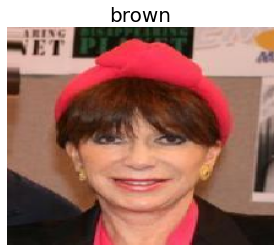

************************************************************
(32, 178, 218, 3)
(32, 4)
32


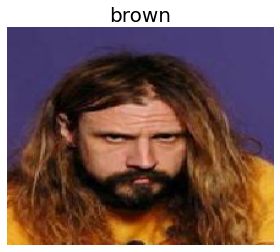

************************************************************
(32, 178, 218, 3)
(32, 4)
64


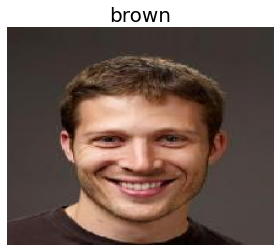

************************************************************
(32, 178, 218, 3)
(32, 4)
96


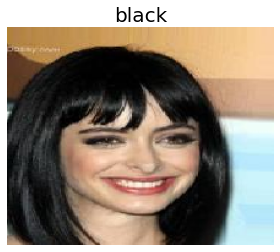

************************************************************
(32, 178, 218, 3)
(32, 4)
128


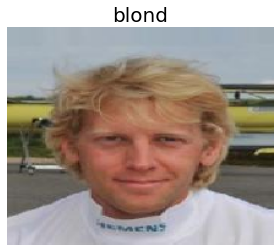

************************************************************
(32, 178, 218, 3)
(32, 4)
160


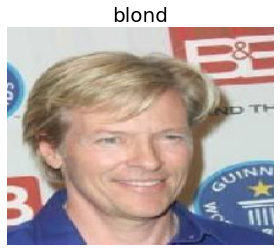

************************************************************
(32, 178, 218, 3)
(32, 4)
192


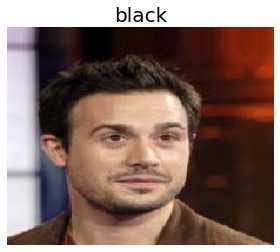

In [23]:
#batch size of until it reach the no of image
cnt=0
for x ,y in  img_gen_dir:
    print("*"*60)
    print(x.shape)#batch size vector
    print(y.shape)#one hot vector
    print(cnt)
    drawimage(x[1],digit2label[y[1].argmax()])

    cnt+=x.shape[0]
    if cnt > 200:
        break

In [24]:
validation_generator = image_gen.flow_from_directory(
        'images/',
        target_size=(178, 218), #try with 250, 250 ORIGINAL WAS 150,150
        batch_size=32,
        class_mode='categorical',
        subset = "validation"
)

Found 720 images belonging to 4 classes.


************************************************************
(32, 178, 218, 3)
(32, 4)
0


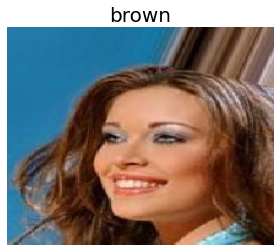

************************************************************
(32, 178, 218, 3)
(32, 4)
32


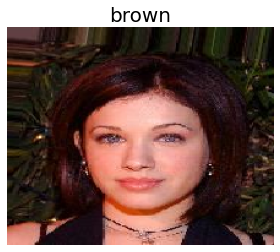

In [25]:
#batch size of until it reach the no of image
cnt=0
for x ,y in  validation_generator:
    print("*"*60)
    print(x.shape)#batch size vector
    print(y.shape)#one hot vector
    print(cnt)
    
    #image draw
    drawimage(x[1],digit2label[y[1].argmax()])
    cnt+=x.shape[0]
    if cnt > 50:
        break

In [26]:
print(img_gen_dir.samples)
print(validation_generator.samples)

2880
720


## Training our Model

In [27]:
from keras.optimizers import Adam
adam = Adam(lr = 1e-04)

In [28]:
model = create_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 176, 216, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 174, 214, 56)      16184     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 87, 107, 56)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 85, 105, 72)       36360     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 42, 52, 72)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 40, 50, 128)       83072     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 25, 128)      

In [29]:
class_model = create_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 176, 216, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 174, 214, 56)      16184     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 87, 107, 56)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 85, 105, 72)       36360     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 42, 52, 72)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 40, 50, 128)       83072     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 25, 128)      

In [30]:
class_model.compile(optimizer=adam ,loss = "categorical_crossentropy",metrics=["accuracy"])

In [31]:
batchsize = 32
n_epoch = 20

In [32]:

hist = class_model.fit_generator(img_gen_dir
                                ,steps_per_epoch=img_gen_dir.samples//batchsize,
                                epochs=n_epoch,
                                 validation_data=validation_generator,
                                 validation_steps=validation_generator.samples//batchsize
                                )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
90/90 [==============================] - 427s 5s/step - loss: 1.1804 - accuracy: 0.4330 - val_loss: 0.9812 - val_accuracy: 0.5639
Epoch 2/20
90/90 [==============================] - 409s 5s/step - loss: 0.9265 - accuracy: 0.5785 - val_loss: 0.9244 - val_accuracy: 0.6151
Epoch 3/20
90/90 [==============================] - 413s 5s/step - loss: 0.8140 - accuracy: 0.6500 - val_loss: 0.7562 - val_accuracy: 0.7145
Epoch 4/20
90/90 [==============================] - 416s 5s/step - loss: 0.6908 - accuracy: 0.7208 - val_loss: 0.6774 - val_accuracy: 0.7344
Epoch 5/20
90/90 [==============================] - 419s 5s/step - loss: 0.6233 - accuracy: 0.7507 - val_loss: 0.6928 - val_accuracy: 0.7159
Epoch 6/20
90/90 [==============================] - 421s 5s/step - loss: 0.5591 - accuracy: 0.7733 - val_loss: 0.7094 - val_accuracy: 0.7131
Epoch 7/20
90/90 [==============================] - 422s 5s/step - loss: 0.515

## Graph Plot

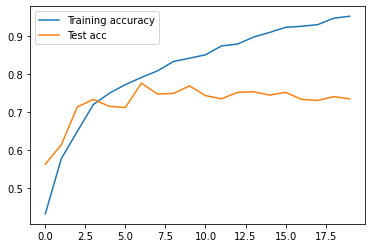

In [33]:
plt.plot(hist.history["accuracy"],label="Training accuracy")
plt.plot(hist.history["val_accuracy"],label="Test acc")
plt.legend()

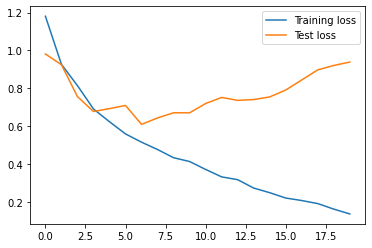

In [34]:
plt.plot(hist.history["loss"],label="Training loss")
plt.plot(hist.history["val_loss"],label="Test loss")
plt.legend()

## Prediction

In [35]:
pred = class_model.predict(x)
pred[1]

array([6.5038651e-01, 1.0537164e-05, 3.4960219e-01, 7.1684832e-07],
      dtype=float32)

************************************************************
(32, 178, 218, 3)
(32, 4)
0


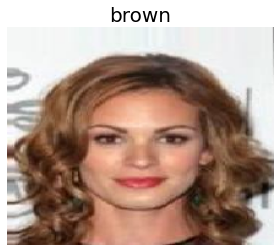

************************************************************
(32, 178, 218, 3)
(32, 4)
1


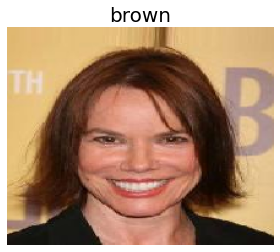

************************************************************
(32, 178, 218, 3)
(32, 4)
2


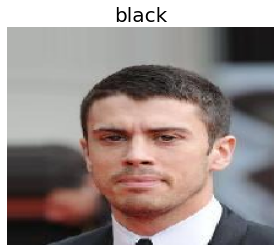

************************************************************
(32, 178, 218, 3)
(32, 4)
3


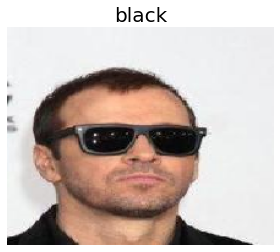

************************************************************
(32, 178, 218, 3)
(32, 4)
4


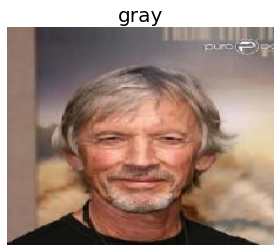

************************************************************
(32, 178, 218, 3)
(32, 4)
5


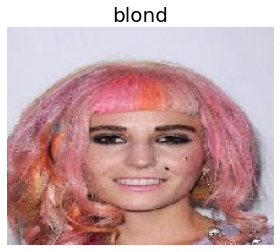

************************************************************
(32, 178, 218, 3)
(32, 4)
6


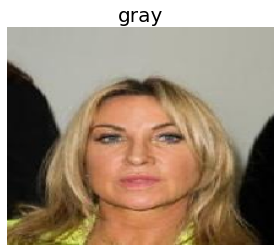

************************************************************
(32, 178, 218, 3)
(32, 4)
7


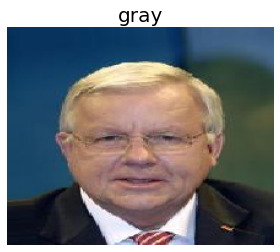

************************************************************
(32, 178, 218, 3)
(32, 4)
8


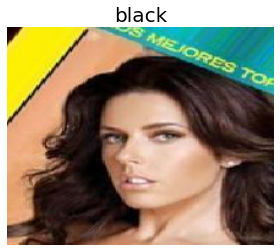

************************************************************
(32, 178, 218, 3)
(32, 4)
9


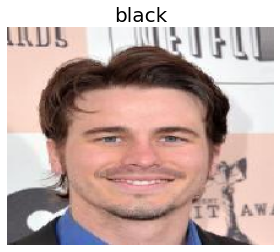

************************************************************
(32, 178, 218, 3)
(32, 4)
10


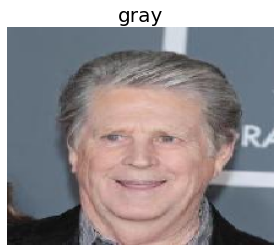

************************************************************
(32, 178, 218, 3)
(32, 4)
11


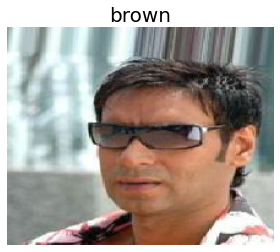

************************************************************
(32, 178, 218, 3)
(32, 4)
12


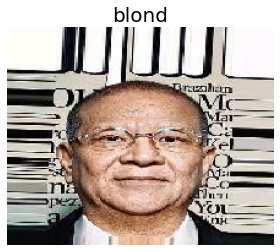

************************************************************
(32, 178, 218, 3)
(32, 4)
13


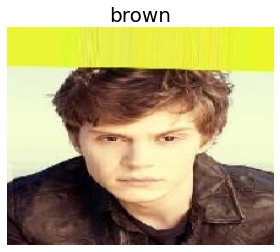

************************************************************
(32, 178, 218, 3)
(32, 4)
14


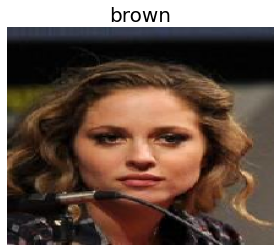

************************************************************
(32, 178, 218, 3)
(32, 4)
15


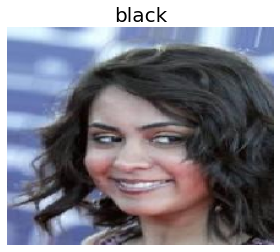

************************************************************
(32, 178, 218, 3)
(32, 4)
16


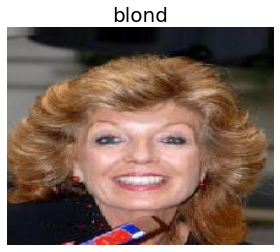

************************************************************
(32, 178, 218, 3)
(32, 4)
17


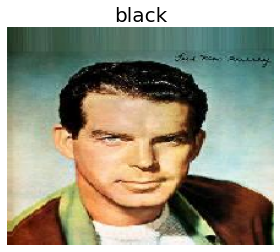

************************************************************
(32, 178, 218, 3)
(32, 4)
18


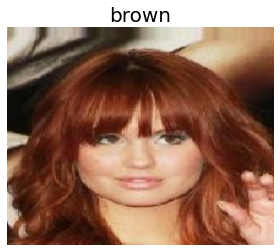

************************************************************
(32, 178, 218, 3)
(32, 4)
19


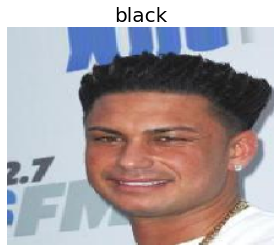

************************************************************
(16, 178, 218, 3)
(16, 4)
20


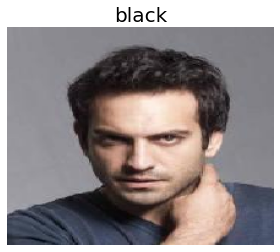

In [36]:
#batch size of until it reach the no of image
cnt=0
for x ,y in  validation_generator:
    print("*"*60)
    print(x.shape)#batch size vector
    print(y.shape)#one hot vector
    print(cnt)
    pred = class_model.predict(x)
    #image draw
    drawimage(x[1],digit2label[pred[1].argmax()])
    cnt+=1
    if cnt > 20:
        break